In [1]:
import pandas as pd

In [2]:
crime_data = pd.read_csv("D:/datasets/CRIME/filtered_crime_data.csv")

In [3]:
neighbourhoods_df = pd.read_csv("D:/DataSets/Neighbourhoods/neighbourhoodsV5.csv")

In [5]:
all_exist = all(neighborhood in neighbourhoods_df["crime_neighbourhood"].values for neighborhood in crime_data["Neighborhood"])

if all_exist:
    print("Every value in crime_data['Neighborhood'] exists in neighbourhoods_df['crime_neighbourhood']")
else:
    print("Not all values in crime_data['Neighborhood'] exist in neighbourhoods_df['crime_neighbourhood']")


Every value in crime_data['Neighborhood'] exists in neighbourhoods_df['crime_neighbourhood']


In [7]:
crime_data = crime_data.rename(columns = {"Neighborhood" : "crime_neighbourhood"})

In [10]:
crime_data = crime_data.drop(columns = ["CrimeCode","Inside_Outside","CrimeDateTime"])

In [12]:
crime_data.to_csv("D:datasets/CRIME/filtered_crime_data_new.csv", index = False)

In [18]:
crime_data_unique = pd.DataFrame({'Unique_Description': crime_data['Description'].unique()})

In [25]:
crime_data

,Description,Weapon,crime_neighbourhood,neighbourhoodGeoLocation
0,LARCENY FROM AUTO,NaN,HAMILTON HILLS,POINT(39.3616138 -76.56905189999999)
1,COMMON ASSAULT,PERSONAL_WEAPONS,FOREST PARK GOLF COURSE,POINT(39.3211342 -76.69180039999999)
2,AGG. ASSAULT,KNIFE_CUTTING_INSTRUMENT,FELLS POINT,POINT(39.2842097 -76.593611)
3,AGG. ASSAULT,KNIFE_CUTTING_INSTRUMENT,FELLS POINT,POINT(39.2842097 -76.593611)
4,AGG. ASSAULT,OTHER,EAST BALTIMORE MIDWAY,POINT(39.31471000000001 -76.60372219999999)
...,...,...,...,...
152937,BURGLARY,NaN,MADISON-EASTEND,POINT(39.3007532 -76.576998)
152938,AGG. ASSAULT,OTHER,PEN LUCY,POINT(39.3390889 -76.60516659999999)
152939,ROBBERY,FIREARM,CENTRAL FOREST PARK,POINT(39.3264513 -76.68819180000001)
152940,LARCENY FROM AUTO,NaN,RIDGELY'S DELIGHT,POINT(39.284645 -76.6246644)


In [19]:
crime_data_unique

,Unique_Description
0,LARCENY FROM AUTO
1,COMMON ASSAULT
2,AGG. ASSAULT
3,AUTO THEFT
4,LARCENY
5,BURGLARY
6,ROBBERY
7,RAPE
8,HOMICIDE
9,ARSON


# Explore statistical distribution in different areas

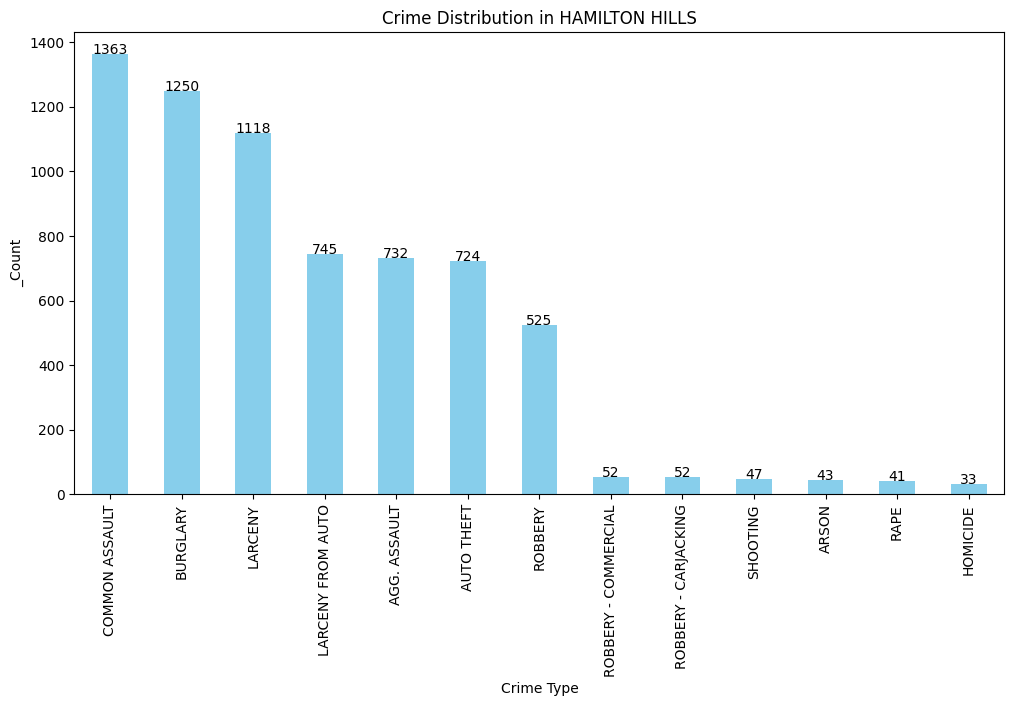

In [38]:
import matplotlib.pyplot as plt

hamilton_hills_data = crime_data[crime_data['crime_neighbourhood'] == 'HAMILTON HILLS']

# Create a histogram
plt.figure(figsize=(12, 6))
hamilton_hills_data['Description'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Crime Distribution in HAMILTON HILLS')
plt.xlabel('Crime Type')
plt.ylabel('_Count')

# Display labels on each bar
for i, count in enumerate(hamilton_hills_data['Description'].value_counts()):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.show()

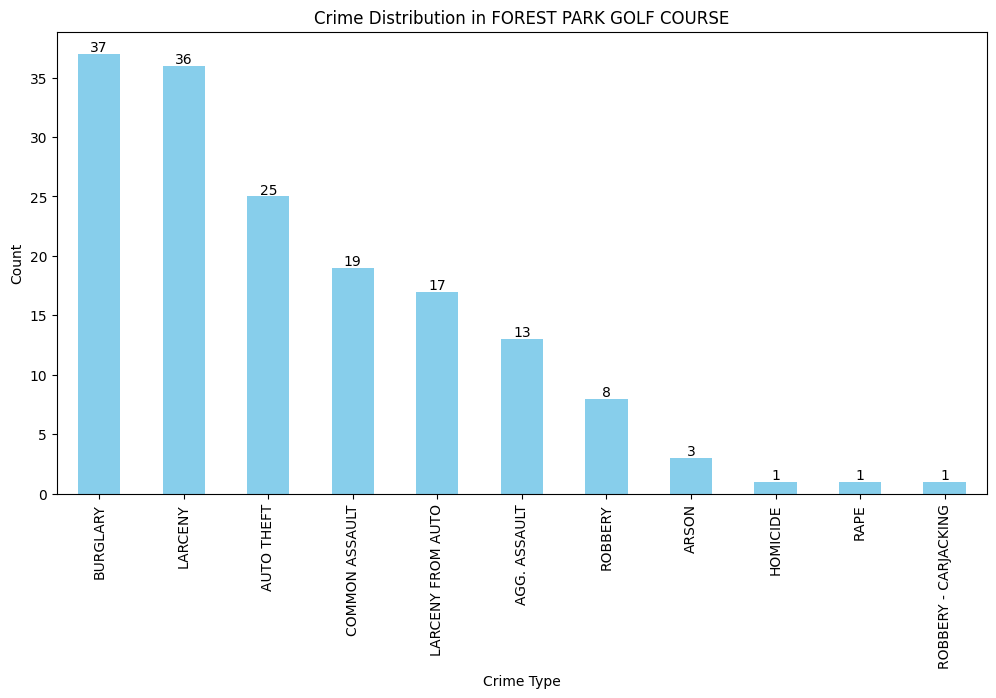

In [29]:
import matplotlib.pyplot as plt

_data = crime_data[crime_data['crime_neighbourhood'] == 'FOREST PARK GOLF COURSE']

# Create a histogram
plt.figure(figsize=(12, 6))
_data['Description'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Crime Distribution in FOREST PARK GOLF COURSE')
plt.xlabel('Crime Type')
plt.ylabel('Count')

# Display labels on each bar
for i, count in enumerate(_data['Description'].value_counts()):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.show()

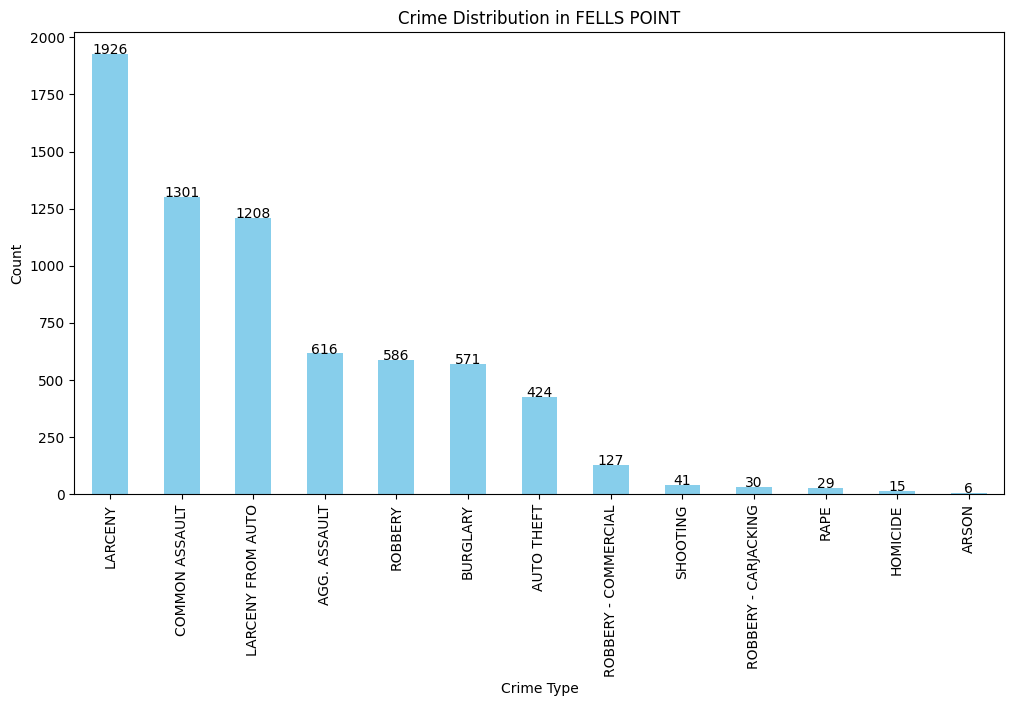

In [30]:
import matplotlib.pyplot as plt

_data = crime_data[crime_data['crime_neighbourhood'] == 'FELLS POINT']

# Create a histogram
plt.figure(figsize=(12, 6))
_data['Description'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Crime Distribution in FELLS POINT')
plt.xlabel('Crime Type')
plt.ylabel('Count')

# Display labels on each bar
for i, count in enumerate(_data['Description'].value_counts()):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.show()

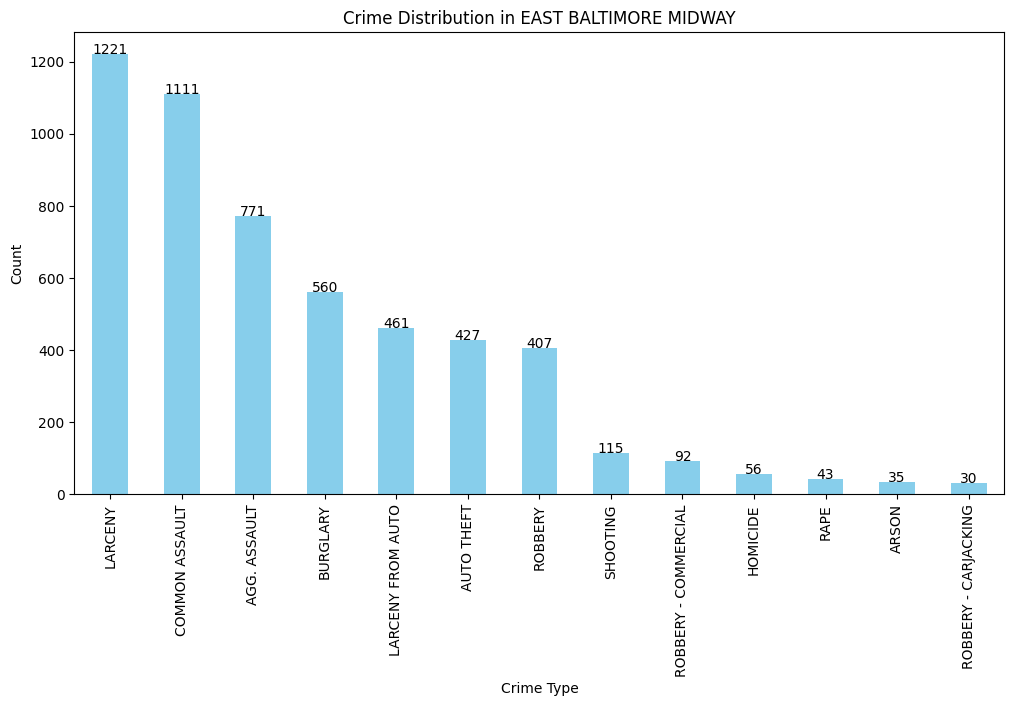

In [33]:
_data = crime_data[crime_data['crime_neighbourhood'] == 'EAST BALTIMORE MIDWAY']

# Create a histogram
plt.figure(figsize=(12, 6))
_data['Description'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Crime Distribution in EAST BALTIMORE MIDWAY')
plt.xlabel('Crime Type')
plt.ylabel('Count')

# Display labels on each bar
for i, count in enumerate(_data['Description'].value_counts()):
    plt.text(i, count + 0.2, str(count), ha='center')

plt.show()

# Define function for calculating z scores

In [49]:
def calculate_z_scores(df, df_name):
    count_name = f'{df_name}_Count'
    z_score_name = f"{df_name}_z_score"
    z_score_mapped_name = f"{df_name}_z_score_mapped"
    
    counts = df.groupby('neighbourhoodGeoLocation').size().reset_index(name=count_name)
    z_scores_df = neighbourhood_z_scores.copy()
    
    z_scores_df = pd.merge(z_scores_df, counts, on='neighbourhoodGeoLocation', how='left')

    z_scores_df[count_name] = z_scores_df[count_name].fillna(0)

    mean_count = z_scores_df[count_name].mean()
    std_dev_count = z_scores_df[count_name].std()

    # Calculate z-score for the count column
    z_scores_df[z_score_name] = (z_scores_df[count_name] - mean_count) / std_dev_count
    
    # define min and max mapping scores
    mapped_min = 1
    mapped_max = 5

    z_scores_df[z_score_mapped_name] = ((z_scores_df[z_score_name] - z_scores_df[z_score_name].min()) / (z_scores_df[z_score_name].max() - z_scores_df[z_score_name].min())) * (mapped_max - mapped_min) + mapped_min
    
    z_scores_df = z_scores_df.drop(z_score_name,axis = 1)
    return z_scores_df

In [78]:
neighbourhood_z_scores = neighbourhoods_df.copy()

# Now make 13 datasets, one for each crime type, they will store all features

# LARCENY FROM AUTO

In [79]:
LARCENY_FROM_AUTO = crime_data[crime_data['Description'] == 'LARCENY FROM AUTO']
LARCENY_FROM_AUTO.to_csv("D:/DataSets/Crime Scores/LARCENY_FROM_AUTO.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(LARCENY_FROM_AUTO, "LARCENY_FROM_AUTO")
len(LARCENY_FROM_AUTO)

18434

# COMMON ASSAULT

In [80]:
COMMON_ASSAULT = crime_data[crime_data['Description'] == 'COMMON ASSAULT']
COMMON_ASSAULT.to_csv("D:/DataSets/Crime Scores/COMMON_ASSAULT.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(COMMON_ASSAULT, "COMMON_ASSAULT")
len(COMMON_ASSAULT)

27584

# AGG. ASSAULT

In [81]:
AGG_ASSAULT = crime_data[crime_data['Description'] == 'AGG. ASSAULT']
AGG_ASSAULT.to_csv("D:/DataSets/Crime Scores/AGG_ASSAULT.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(AGG_ASSAULT, "AGG_ASSAULT")
len(AGG_ASSAULT)

17408

# AUTO THEFT

In [82]:
AUTO_THEFT = crime_data[crime_data['Description'] == 'AUTO THEFT']
AUTO_THEFT.to_csv("D:/DataSets/Crime Scores/AUTO_THEFT.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(AUTO_THEFT, "AUTO_THEFT")
len(AUTO_THEFT)

14093

# LARCENY 

In [83]:
LARCENY = crime_data[crime_data['Description'] == 'LARCENY']
LARCENY.to_csv("D:/DataSets/Crime Scores/LARCENY.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(LARCENY, "LARCENY")
len(LARCENY)

35243

# BURGLARY

In [84]:
BURGLARY = crime_data[crime_data['Description'] == 'BURGLARY']
BURGLARY.to_csv("D:/DataSets/Crime Scores/BURGLARY.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(BURGLARY, "BURGLARY")
len(BURGLARY)

20807

# ROBBERY

In [85]:
ROBBERY = crime_data[crime_data['Description'] == 'ROBBERY']
ROBBERY.to_csv("D:/DataSets/Crime Scores/ROBBERY.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(ROBBERY, "ROBBERY")
len(ROBBERY)

12068

# RAPE

In [86]:
RAPE = crime_data[crime_data['Description'] == 'RAPE']
RAPE.to_csv("D:/DataSets/Crime Scores/RAPE.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(RAPE, "RAPE")
len(RAPE)

930

# HOMICIDE

In [87]:
HOMICIDE = crime_data[crime_data['Description'] == 'HOMICIDE']
HOMICIDE.to_csv("D:/DataSets/Crime Scores/HOMICIDE.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(HOMICIDE, "HOMICIDE")
len(HOMICIDE)

896

# ARSON

In [88]:
ARSON = crime_data[crime_data['Description'] == 'ARSON']
ARSON.to_csv("D:/DataSets/Crime Scores/ARSON.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(ARSON, "ARSON")
len(ARSON)

681

# SHOOTING

In [89]:
SHOOTING = crime_data[crime_data['Description'] == 'SHOOTING']
SHOOTING.to_csv("D:/DataSets/Crime Scores/SHOOTING.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(SHOOTING, "SHOOTING")
len(SHOOTING)

1696

# ROBBERY CARJACKING

In [90]:
ROBBERY_CARJACKING = crime_data[crime_data['Description'] == 'ROBBERY - CARJACKING']
ROBBERY_CARJACKING.to_csv("D:/DataSets/Crime Scores/ROBBERY_CARJACKING.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(ROBBERY_CARJACKING, "ROBBERY_CARJACKING")
len(ROBBERY_CARJACKING)

1301

# ROBBERY COMMERCIAL

In [91]:
ROBBERY_COMMERCIAL = crime_data[crime_data['Description'] == 'ROBBERY - COMMERCIAL']
ROBBERY_COMMERCIAL.to_csv("D:/DataSets/Crime Scores/ROBBERY_COMMERCIAL.csv", index = False)
neighbourhood_z_scores = calculate_z_scores(ROBBERY_COMMERCIAL, "ROBBERY_COMMERCIAL")
len(ROBBERY_COMMERCIAL)

1801

In [92]:
neighbourhood_z_scores

,neighbourhoodID,neighbourhoodGeoLocation,crime_neighbourhood,LARCENY_FROM_AUTO_Count,LARCENY_FROM_AUTO_z_score_mapped,COMMON_ASSAULT_Count,COMMON_ASSAULT_z_score_mapped,AGG_ASSAULT_Count,AGG_ASSAULT_z_score_mapped,AUTO_THEFT_Count,...,HOMICIDE_Count,HOMICIDE_z_score_mapped,ARSON_Count,ARSON_z_score_mapped,SHOOTING_Count,SHOOTING_z_score_mapped,ROBBERY_CARJACKING_Count,ROBBERY_CARJACKING_z_score_mapped,ROBBERY_COMMERCIAL_Count,ROBBERY_COMMERCIAL_z_score_mapped
0,0,POINT(39.370859 -76.6701475),MOUNT WASHINGTON,388.0,2.284768,102.0,1.173839,45.0,1.121540,148.0,...,2.0,1.103896,2.0,1.1250,2.0,1.054054,16.0,1.592593,4.0,1.105960
1,1,POINT(39.2842097 -76.593611),FELLS POINT,1208.0,5.000000,1301.0,3.217299,616.0,2.663741,424.0,...,15.0,1.779221,6.0,1.3750,41.0,2.108108,30.0,2.111111,127.0,4.364238
2,2,POINT(39.3216614 -76.5737173),BELAIR-EDISON,954.0,4.158940,2347.0,5.000000,1481.0,5.000000,1423.0,...,77.0,5.000000,64.0,5.0000,148.0,5.000000,108.0,5.000000,151.0,5.000000
3,3,POINT(39.292007 -76.6167212),UNIVERSITY OF MARYLAND,197.0,1.652318,326.0,1.555603,313.0,1.845375,116.0,...,8.0,1.415584,4.0,1.2500,49.0,2.324324,9.0,1.333333,34.0,1.900662
4,4,POINT(39.3416271 -76.68169619999999),LANGSTON HUGHES,109.0,1.360927,164.0,1.279506,144.0,1.388926,102.0,...,15.0,1.779221,4.0,1.2500,26.0,1.702703,11.0,1.407407,26.0,1.688742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,POINT(39.2973857 -76.66292899999999),FRANKLINTOWN ROAD,103.0,1.341060,363.0,1.618662,316.0,1.853477,187.0,...,19.0,1.987013,12.0,1.7500,52.0,2.405405,21.0,1.777778,9.0,1.238411
69,69,POINT(39.30592439999999 -76.6650946),ROSEMONT,133.0,1.440397,640.0,2.090754,468.0,2.264011,286.0,...,26.0,2.350649,23.0,2.4375,39.0,2.054054,42.0,2.555556,5.0,1.132450
70,70,POINT(39.3625548 -76.544488),OVERLEA,62.0,1.205298,50.0,1.085215,36.0,1.097232,37.0,...,0.0,1.000000,4.0,1.2500,1.0,1.027027,2.0,1.074074,2.0,1.052980
71,71,POINT(39.2208578 -76.5863882),CURTIS BAY INDUSTRIAL AREA,20.0,1.066225,6.0,1.010226,6.0,1.016205,14.0,...,0.0,1.000000,0.0,1.0000,0.0,1.000000,0.0,1.000000,0.0,1.000000


# Make a copy for the rest

In [93]:
stats = neighbourhood_z_scores.copy()

In [94]:
count_columns = stats.filter(like='Count')

# Create a new column 'sum_z_scores' which contains the sum of the "_z_score_mapped" values for each row
stats['sum_count'] = count_columns.apply(lambda row: row.sum(), axis=1)


In [95]:
z_score_columns = stats.filter(like='_z_score_mapped')

# Create a new column 'sum_z_scores' which contains the sum of the "_z_score_mapped" values for each row
stats['sum_z_scores'] = z_score_columns.apply(lambda row: row.sum(), axis=1)

In [97]:
pd.set_option("display.max_columns", None)
stats

,neighbourhoodID,neighbourhoodGeoLocation,crime_neighbourhood,LARCENY_FROM_AUTO_Count,LARCENY_FROM_AUTO_z_score_mapped,COMMON_ASSAULT_Count,COMMON_ASSAULT_z_score_mapped,AGG_ASSAULT_Count,AGG_ASSAULT_z_score_mapped,AUTO_THEFT_Count,AUTO_THEFT_z_score_mapped,LARCENY_Count,LARCENY_z_score_mapped,BURGLARY_Count,BURGLARY_z_score_mapped,ROBBERY_Count,ROBBERY_z_score_mapped,RAPE_Count,RAPE_z_score_mapped,HOMICIDE_Count,HOMICIDE_z_score_mapped,ARSON_Count,ARSON_z_score_mapped,SHOOTING_Count,SHOOTING_z_score_mapped,ROBBERY_CARJACKING_Count,ROBBERY_CARJACKING_z_score_mapped,ROBBERY_COMMERCIAL_Count,ROBBERY_COMMERCIAL_z_score_mapped,sum_count,sum_z_scores
0,0,POINT(39.370859 -76.6701475),MOUNT WASHINGTON,388.0,2.284768,102.0,1.173839,45.0,1.121540,148.0,1.416022,310.0,1.307083,424.0,1.883333,29.0,1.121593,7.0,1.383562,2.0,1.103896,2.0,1.1250,2.0,1.054054,16.0,1.592593,4.0,1.105960,1479.0,17.673243
1,1,POINT(39.2842097 -76.593611),FELLS POINT,1208.0,5.000000,1301.0,3.217299,616.0,2.663741,424.0,2.191848,1926.0,2.907875,571.0,2.189583,586.0,3.457023,29.0,2.589041,15.0,1.779221,6.0,1.3750,41.0,2.108108,30.0,2.111111,127.0,4.364238,6880.0,35.954089
2,2,POINT(39.3216614 -76.5737173),BELAIR-EDISON,954.0,4.158940,2347.0,5.000000,1481.0,5.000000,1423.0,5.000000,2787.0,3.760773,1920.0,5.000000,954.0,5.000000,73.0,5.000000,77.0,5.000000,64.0,5.0000,148.0,5.000000,108.0,5.000000,151.0,5.000000,12487.0,62.919713
3,3,POINT(39.292007 -76.6167212),UNIVERSITY OF MARYLAND,197.0,1.652318,326.0,1.555603,313.0,1.845375,116.0,1.326072,482.0,1.477464,56.0,1.116667,170.0,1.712788,23.0,2.260274,8.0,1.415584,4.0,1.2500,49.0,2.324324,9.0,1.333333,34.0,1.900662,1787.0,21.170465
4,4,POINT(39.3416271 -76.68169619999999),LANGSTON HUGHES,109.0,1.360927,164.0,1.279506,144.0,1.388926,102.0,1.286718,261.0,1.258544,118.0,1.245833,83.0,1.348008,7.0,1.383562,15.0,1.779221,4.0,1.2500,26.0,1.702703,11.0,1.407407,26.0,1.688742,1070.0,18.380097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,POINT(39.2973857 -76.66292899999999),FRANKLINTOWN ROAD,103.0,1.341060,363.0,1.618662,316.0,1.853477,187.0,1.525650,263.0,1.260525,212.0,1.441667,127.0,1.532495,11.0,1.602740,19.0,1.987013,12.0,1.7500,52.0,2.405405,21.0,1.777778,9.0,1.238411,1695.0,21.334882
69,69,POINT(39.30592439999999 -76.6650946),ROSEMONT,133.0,1.440397,640.0,2.090754,468.0,2.264011,286.0,1.803935,342.0,1.338782,443.0,1.922917,181.0,1.758910,18.0,1.986301,26.0,2.350649,23.0,2.4375,39.0,2.054054,42.0,2.555556,5.0,1.132450,2646.0,25.136216
70,70,POINT(39.3625548 -76.544488),OVERLEA,62.0,1.205298,50.0,1.085215,36.0,1.097232,37.0,1.104006,62.0,1.061417,84.0,1.175000,16.0,1.067086,3.0,1.164384,0.0,1.000000,4.0,1.2500,1.0,1.027027,2.0,1.074074,2.0,1.052980,359.0,14.363718
71,71,POINT(39.2208578 -76.5863882),CURTIS BAY INDUSTRIAL AREA,20.0,1.066225,6.0,1.010226,6.0,1.016205,14.0,1.039353,58.0,1.057454,31.0,1.064583,2.0,1.008386,0.0,1.000000,0.0,1.000000,0.0,1.0000,0.0,1.000000,0.0,1.000000,0.0,1.000000,137.0,13.262433


# apply sigmoid mapping inverse function for final scores

In [114]:
# Sigmoid mapping function
inverted_sigmoid_mapping

def inverted_sigmoid_mapping(x, mean, scale):
    return 1 + 4 / (1 + np.exp(1.75 * (x - mean) / scale))

# Calculate mean and standard deviation
mean_value = stats['sum_z_scores'].mean()
scale_value = stats['sum_z_scores'].std()

stats['z_scores_before_mapping'] = (stats['sum_z_scores'] - mean_value) / scale_value

# Apply the sigmoid mapping
stats['mapped_values_sigmoid'] = inverted_sigmoid_mapping(stats['sum_z_scores'], mean_value, scale_value)

In [115]:
stats

,neighbourhoodID,neighbourhoodGeoLocation,crime_neighbourhood,LARCENY_FROM_AUTO_Count,LARCENY_FROM_AUTO_z_score_mapped,COMMON_ASSAULT_Count,COMMON_ASSAULT_z_score_mapped,AGG_ASSAULT_Count,AGG_ASSAULT_z_score_mapped,AUTO_THEFT_Count,AUTO_THEFT_z_score_mapped,LARCENY_Count,LARCENY_z_score_mapped,BURGLARY_Count,BURGLARY_z_score_mapped,ROBBERY_Count,ROBBERY_z_score_mapped,RAPE_Count,RAPE_z_score_mapped,HOMICIDE_Count,HOMICIDE_z_score_mapped,ARSON_Count,ARSON_z_score_mapped,SHOOTING_Count,SHOOTING_z_score_mapped,ROBBERY_CARJACKING_Count,ROBBERY_CARJACKING_z_score_mapped,ROBBERY_COMMERCIAL_Count,ROBBERY_COMMERCIAL_z_score_mapped,sum_count,sum_z_scores,z_scores_before_mapping,mapped_values_sigmoid
0,0,POINT(39.370859 -76.6701475),MOUNT WASHINGTON,388.0,2.284768,102.0,1.173839,45.0,1.121540,148.0,1.416022,310.0,1.307083,424.0,1.883333,29.0,1.121593,7.0,1.383562,2.0,1.103896,2.0,1.1250,2.0,1.054054,16.0,1.592593,4.0,1.105960,1479.0,17.673243,-0.412554,3.692163
1,1,POINT(39.2842097 -76.593611),FELLS POINT,1208.0,5.000000,1301.0,3.217299,616.0,2.663741,424.0,2.191848,1926.0,2.907875,571.0,2.189583,586.0,3.457023,29.0,2.589041,15.0,1.779221,6.0,1.3750,41.0,2.108108,30.0,2.111111,127.0,4.364238,6880.0,35.954089,1.671352,1.203752
2,2,POINT(39.3216614 -76.5737173),BELAIR-EDISON,954.0,4.158940,2347.0,5.000000,1481.0,5.000000,1423.0,5.000000,2787.0,3.760773,1920.0,5.000000,954.0,5.000000,73.0,5.000000,77.0,5.000000,64.0,5.0000,148.0,5.000000,108.0,5.000000,151.0,5.000000,12487.0,62.919713,4.745270,1.000990
3,3,POINT(39.292007 -76.6167212),UNIVERSITY OF MARYLAND,197.0,1.652318,326.0,1.555603,313.0,1.845375,116.0,1.326072,482.0,1.477464,56.0,1.116667,170.0,1.712788,23.0,2.260274,8.0,1.415584,4.0,1.2500,49.0,2.324324,9.0,1.333333,34.0,1.900662,1787.0,21.170465,-0.013892,3.024310
4,4,POINT(39.3416271 -76.68169619999999),LANGSTON HUGHES,109.0,1.360927,164.0,1.279506,144.0,1.388926,102.0,1.286718,261.0,1.258544,118.0,1.245833,83.0,1.348008,7.0,1.383562,15.0,1.779221,4.0,1.2500,26.0,1.702703,11.0,1.407407,26.0,1.688742,1070.0,18.380097,-0.331977,3.565153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,POINT(39.2973857 -76.66292899999999),FRANKLINTOWN ROAD,103.0,1.341060,363.0,1.618662,316.0,1.853477,187.0,1.525650,263.0,1.260525,212.0,1.441667,127.0,1.532495,11.0,1.602740,19.0,1.987013,12.0,1.7500,52.0,2.405405,21.0,1.777778,9.0,1.238411,1695.0,21.334882,0.004850,2.991512
69,69,POINT(39.30592439999999 -76.6650946),ROSEMONT,133.0,1.440397,640.0,2.090754,468.0,2.264011,286.0,1.803935,342.0,1.338782,443.0,1.922917,181.0,1.758910,18.0,1.986301,26.0,2.350649,23.0,2.4375,39.0,2.054054,42.0,2.555556,5.0,1.132450,2646.0,25.136216,0.438179,2.268675
70,70,POINT(39.3625548 -76.544488),OVERLEA,62.0,1.205298,50.0,1.085215,36.0,1.097232,37.0,1.104006,62.0,1.061417,84.0,1.175000,16.0,1.067086,3.0,1.164384,0.0,1.000000,4.0,1.2500,1.0,1.027027,2.0,1.074074,2.0,1.052980,359.0,14.363718,-0.789820,4.197367
71,71,POINT(39.2208578 -76.5863882),CURTIS BAY INDUSTRIAL AREA,20.0,1.066225,6.0,1.010226,6.0,1.016205,14.0,1.039353,58.0,1.057454,31.0,1.064583,2.0,1.008386,0.0,1.000000,0.0,1.000000,0.0,1.0000,0.0,1.000000,0.0,1.000000,0.0,1.000000,137.0,13.262433,-0.915360,4.329124


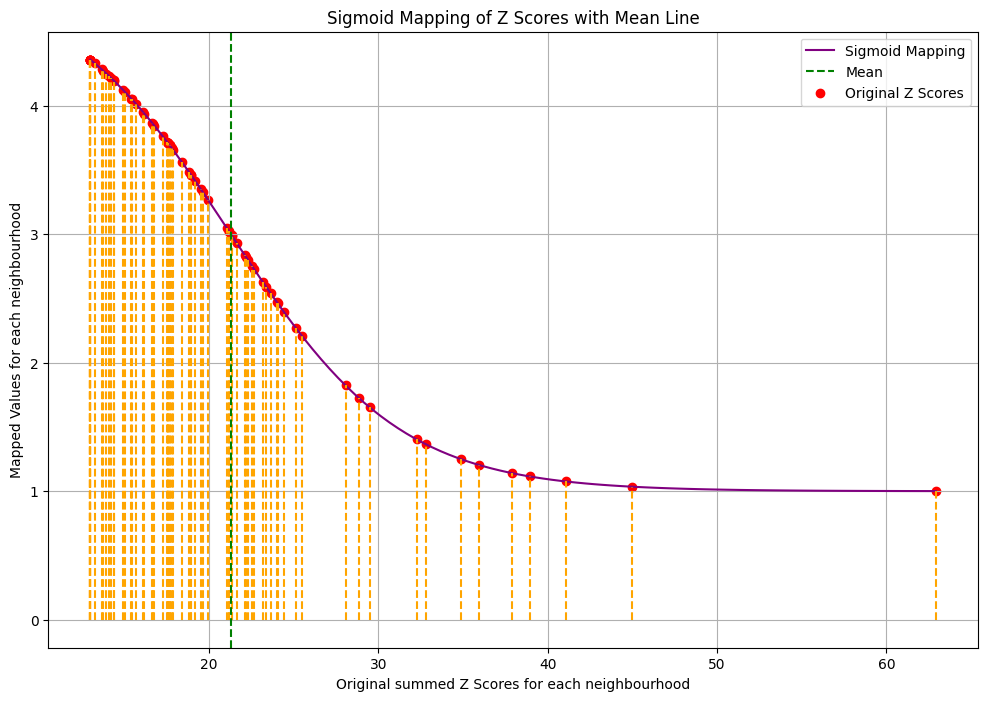

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid mapping function
def inverted_sigmoid_mapping(x, mean, scale):
    return 1 + 4 / (1 + np.exp(1.75 * (x - mean) / scale))

# Calculate mean and standard deviation
mean_value = stats['sum_z_scores'].mean()
scale_value = stats['sum_z_scores'].std()

# Apply the sigmoid mapping0.05
stats['mapped_values_sigmoid'] = inverted_sigmoid_mapping(stats['sum_z_scores'], mean_value, scale_value)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting the sigmoid function
x_values = np.linspace(stats['sum_z_scores'].min(), stats['sum_z_scores'].max(), 100)
y_values = inverted_sigmoid_mapping(x_values, mean_value, scale_value)

plt.plot(x_values, y_values, color='purple', label='Sigmoid Mapping')

# Plotting vertical lines
for index, row in stats.iterrows():
    plt.plot([row['sum_z_scores'], row['sum_z_scores']], [0, row['mapped_values_sigmoid']], linestyle='dashed', color='orange')

# Plotting mean line
plt.axvline(x=mean_value, color='green', linestyle='dashed', label='Mean')

plt.scatter(stats['sum_z_scores'], stats['mapped_values_sigmoid'], color='red', label='Original Z Scores')
plt.xlabel('Original summed Z Scores for each neighbourhood')
plt.ylabel('Mapped Values for each neighbourhood')
plt.legend()
plt.title('Sigmoid Mapping of Z Scores with Mean Line')
plt.grid(True)
plt.show()
